In [1]:
import numpy as np
import matplotlib.pyplot as  plt

In [2]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

In [4]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.93115438108484

上面直接加载全部数据，已经不是二分类问题了，变成了十分类的问题

逻辑回归的y_train如果是多值的时候，会使用OVR进行

In [5]:
y_predict = log_reg.predict(X_test)

In [6]:
from sklearn.metrics import precision_score
precision_score(y_test, y_predict, average="micro")

0.93115438108484

average这个参数默认是binary,进行二分类，当输入参数为多值的时候，就需要修改参数

In [7]:
from sklearn.metrics import confusion_matrix

In [9]:
confusion_matrix(y_test, y_predict)

array([[142,   0,   0,   0,   2,   0,   0,   0,   0,   0],
       [  0, 131,   0,   0,   0,   0,   0,   0,   4,   2],
       [  0,   1, 135,   0,   0,   0,   0,   1,   6,   0],
       [  0,   0,   1, 136,   0,   6,   0,   1,   3,   1],
       [  0,   4,   0,   0, 140,   0,   0,   1,   0,   0],
       [  0,   5,   0,   0,   0, 139,   1,   0,   1,   2],
       [  0,   0,   0,   0,   1,   0, 142,   0,   3,   0],
       [  0,   0,   0,   0,   1,   0,   0, 133,   6,   1],
       [  0,   7,   2,   2,   0,   2,   7,   0, 118,   2],
       [  0,   9,   0,   1,   0,   3,   0,   4,   6, 123]], dtype=int64)

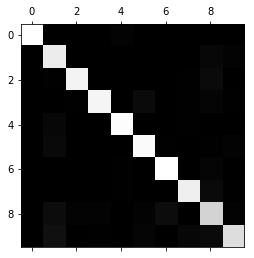

In [10]:
cfm = confusion_matrix(y_test, y_predict)
plt.matshow(cfm, cmap=plt.cm.gray)

cmap是数字与颜色进行映射，plt.cm.gray是将其进行灰度化

In [11]:
row_sums = np.sum(cfm, axis=1)

In [12]:
err_matrix = cfm / row_sums
np.fill_diagonal(err_matrix, 0)   
err_matrix

array([[0.        , 0.        , 0.        , 0.        , 0.0137931 ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.02857143, 0.01369863],
       [0.        , 0.00729927, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.0070922 , 0.04285714, 0.        ],
       [0.        , 0.        , 0.00699301, 0.        , 0.        ,
        0.04054054, 0.        , 0.0070922 , 0.02142857, 0.00684932],
       [0.        , 0.02919708, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.0070922 , 0.        , 0.        ],
       [0.        , 0.03649635, 0.        , 0.        , 0.        ,
        0.        , 0.00684932, 0.        , 0.00714286, 0.01369863],
       [0.        , 0.        , 0.        , 0.        , 0.00689655,
        0.        , 0.        , 0.        , 0.02142857, 0.        ],
       [0.        , 0.        , 0.       

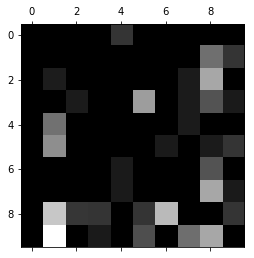

In [13]:
plt.matshow(err_matrix, cmap=plt.cm.gray)

越亮的地方，代表犯错越多的地方